In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def distort_image(im, prop):
    if prop < 0 or prop > 1:
        print("Out-of-bound proportion: going to default 0.05")
        prop = 0.05  # Default

    imd = np.copy(im)
    indx = np.random.permutation(len(imd.ravel()))
    todist = indx[:round(len(indx) * prop)]
    imd.flat[todist] = -imd.flat[todist]

    return imd

# This function takes an input image im and a distortion proportion prop.
# If the proportion is out of the valid range (0 to 1), it sets a default value of 0.05.
# It then randomly selects a subset of the image elements based on the proportion and negates their values.

def distort_vector(p,d):
        if d < 0 or d > 1:
            print("Out-of-bound proportion: going to default 0.05")
            d = 0.05  # Default

        pd = p
        indx = np.random.permutation(len(pd))
        todist = indx[:round(len(indx) * d)]
        pd[todist] = -pd[todist]

        return pd


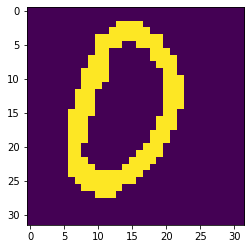

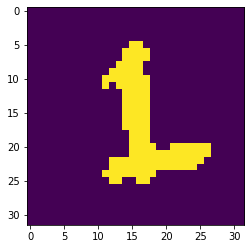

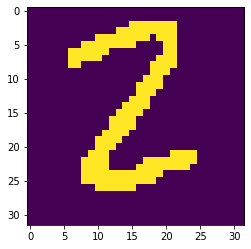

In [70]:
p0 = np.loadtxt('../Lab2_2/lab2_2_data/p0.csv')
p1 = np.loadtxt('../Lab2_2/lab2_2_data/p1.csv')
p2 = np.loadtxt('../Lab2_2/lab2_2_data/p2.csv')

im0 = np.transpose(np.reshape(p0, (32, 32)))
im1 = np.transpose(np.reshape(p1, (32, 32)))
im2 = np.transpose(np.reshape(p2, (32, 32)))

plt.imshow(im0)
plt.show()
plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

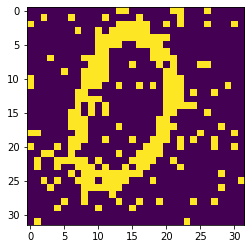

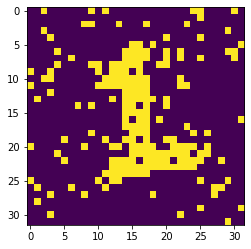

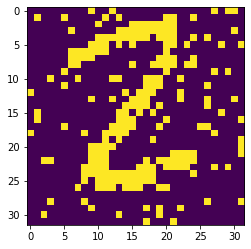

In [71]:
im0d = distort_image(im0, 0.1)
im1d = distort_image(im1, 0.1)
im2d = distort_image(im2, 0.1)

plt.imshow(im0d)
plt.show()
plt.imshow(im1d)
plt.show()
plt.imshow(im2d)
plt.show()

# Storage Phase (learning)

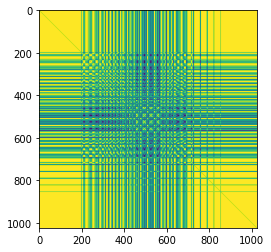

In [72]:

w = (1/len(p0))*((np.outer(p0,p0)+np.outer(p1,p1)+np.outer(p2,p2))-3*np.identity(len(np.outer(p2,p2)))) #va bene??
#w = w - 3*np.identity(len(w))
#np.fill_diagonal(w, 0)
plt.imshow(w)


# Retrieval Phase

[-1. -1. -1. ... -1. -1. -1.]
Epoch 0 of 100
[734 227 153 ... 102 530 391]
[636 657 813 ... 424 268 449]
[588 916 548 ... 344 369 129]
stop iterating
3072
40


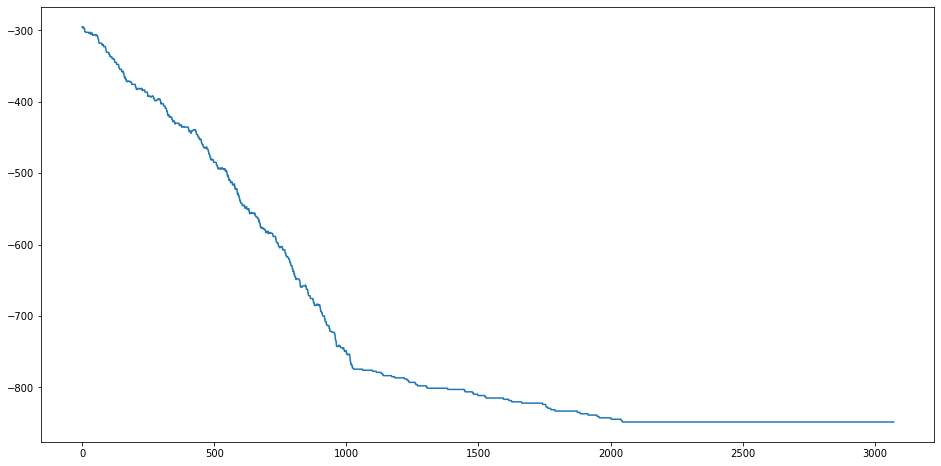

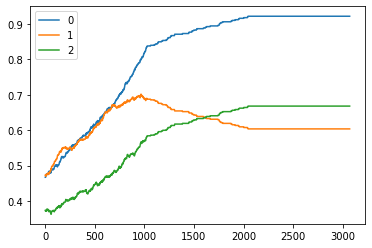

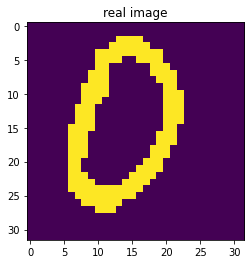

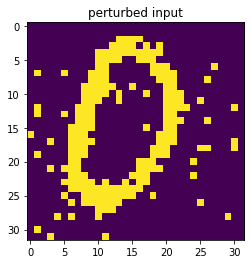

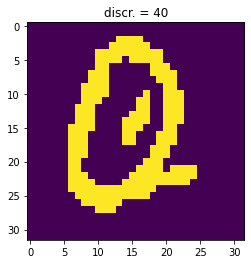

In [73]:
#initialization
real_img = im0
probe = distort_image(real_img, 0.05)

bias = 0.5

x = probe.ravel()
print(x)
#iteration until convergence
epochs = 100 #max epochs
E_hist = []
m0_hist = []
m1_hist = []
m2_hist = []

for N in range (epochs):

    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    xold = np.copy(x)

    i = np.random.permutation(len(x))
    print(i)
    for j in i:
        x[j] = np.sign(np.dot(w[j,:], x)+bias)

        #overlap 
        m0 = 1/len(p0)*np.dot(p0,x)
        m1 = 1/len(p1)*np.dot(p1,x)
        m2 = 1/len(p2)*np.dot(p2,x)
        m0_hist = np.append(m0_hist, m0)
        m1_hist = np.append(m1_hist, m1)
        m2_hist = np.append(m2_hist, m2)


        #Energy

        E = -0.5*np.dot(x,np.dot(w,x)) - 
        E_hist = np.append(E_hist, E)

    if np.array_equal(x, xold):
        print('stop iterating')
        break


plt.figure(figsize=(16, 8))
t=np.arange(0,len(E_hist))
print(len(t))
plt.plot(t, E_hist, label = 'E')

plt.figure()
plt.plot(t, m0_hist, label = '0')
plt.plot(t, m1_hist, label = '1')
plt.plot(t, m2_hist, label = '2')
plt.legend()

imx = np.transpose(np.reshape(x, (32, 32)))



#discrepancy
d = 0
for i in range(len(x)):
    if x[i] != p0[i]:
        d = d+1
print(d)

plt.figure()
plt.title(f'real image')
plt.imshow(real_img)

plt.figure()
plt.title(f'perturbed input')
plt.imshow(probe)

plt.figure()
plt.title(f'discr. = {d}')
plt.imshow(imx)
